# Earth Science Citation Replication Project

## 0. Install Packages

In [2]:
import csv
import pandas as pd
from time import sleep
import re
import os
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

## 1. Sampling

### Import file
Next, import the csv file that includes your records from Web of Science.

In [4]:
#Import csv

data = pd.read_csv("Institution_Reference_Files/Boulder_References.csv", encoding="ISO-8859-1")
data

,Institution,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
0,CUBoulder,J,"Picard, A; Gartman, A; Cosmidis, J; Obst, M; V...",NaN,NaN,NaN,"Picard, Aude; Gartman, Amy; Cosmidis, Julie; O...",NaN,NaN,Authigenic metastable iron sulfide minerals pr...,...,13,Geochemistry & Geophysics,Geochemistry & Geophysics,JQ7AA,WOS:000499092400003,NaN,NaN,NaN,NaN,6/19/2020
1,CUBoulder,J,"Coddington, O; Lean, J; Pilewskie, P; Snow, M;...",NaN,NaN,NaN,"Coddington, O.; Lean, J.; Pilewskie, P.; Snow,...",NaN,NaN,Solar Irradiance Variability: Comparisons of M...,...,31,"Astronomy & Astrophysics; Geosciences, Multidi...",Astronomy & Astrophysics; Geology,KM4PD,WOS:000504607600001,NaN,DOAJ Gold,NaN,NaN,6/19/2020
2,CUBoulder,J,"Oak, YJ; Park, RJ; Schroeder, JR; Crawford, JH...",NaN,NaN,NaN,"Oak, Yujin J.; Park, Rokjin J.; Schroeder, Jas...",NaN,NaN,Evaluation of simulated O-3 production efficie...,...,15,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,JZ5PA,WOS:000505152900001,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
3,CUBoulder,J,"Harder, JW; Beland, S; Snow, M",NaN,NaN,NaN,"Harder, J. W.; Beland, S.; Snow, M.",NaN,NaN,SORCE-Based Solar Spectral Irradiance (SSI) Re...,...,21,"Astronomy & Astrophysics; Geosciences, Multidi...",Astronomy & Astrophysics; Geology,KM4PD,WOS:000504500500001,NaN,DOAJ Gold,NaN,NaN,6/19/2020
4,CUBoulder,J,"Hirashima, H; Avanzi, F; Wever, N",NaN,NaN,NaN,"Hirashima, Hiroyuki; Avanzi, Francesco; Wever,...",NaN,NaN,Wet-Snow Metamorphism Drives the Transition Fr...,...,10,"Geosciences, Multidisciplinary",Geology,KL6AK,WOS:000504537700001,NaN,Other Gold,NaN,NaN,6/19/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,CUBoulder,J,"Lee, H; Shum, CK; Emery, W; Calmant, S; Deng, ...",NaN,NaN,NaN,"Lee, Hyongki; Shum, C. K.; Emery, William; Cal...",NaN,NaN,Validation of Jason-2 Altimeter Data by Wavefo...,...,13,Geochemistry & Geophysics; Oceanography; Remot...,Geochemistry & Geophysics; Oceanography; Remot...,645AI,WOS:000281422900016,NaN,NaN,NaN,NaN,6/19/2020
7435,CUBoulder,J,"Nerem, RS; Chambers, DP; Choe, C; Mitchum, GT",NaN,NaN,NaN,"Nerem, R. S.; Chambers, D. P.; Choe, C.; Mitch...",NaN,NaN,Estimating Mean Sea Level Change from the TOPE...,...,12,Geochemistry & Geophysics; Oceanography; Remot...,Geochemistry & Geophysics; Oceanography; Remot...,645AI,WOS:000281422900023,NaN,NaN,Y,N,6/19/2020
7436,CUBoulder,J,"Smith, BL; Yuter, SE; Neiman, PJ; Kingsmill, DE",NaN,NaN,NaN,"Smith, Barrett L.; Yuter, Sandra E.; Neiman, P...",NaN,NaN,Water Vapor Fluxes and Orographic Precipitatio...,...,27,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,552WO,WOS:000274324900005,NaN,NaN,NaN,NaN,6/19/2020
7437,CUBoulder,J,"Turnbull, JC; Lehman, SJ; Morgan, S; Wolak, C",NaN,NaN,NaN,"Turnbull, Jocelyn C.; Lehman, Scott J.; Morgan...",NaN,NaN,A NEW AUTOMATED EXTRACTION SYSTEM FOR C-14 MEA...,...,9,Geochemistry & Geophysics,Geochemistry & Geophysics,696JO,WOS:000285437900042,NaN,Bronze,NaN,NaN,6/19/2020


### Create a sample

Our total number of records is: 17648 

Let's compute the proportion of the total for each institution.

In [1]:
total = 7439 + 5002 + 3862 + 1344
CUB = 7439/total
UCB = 5002/total
UCLA = 3862/total
UH = 1349/total

print('Total = ',total)
print('CUB = ',CUB)
print('UCB = ',UCB)
print('UCLA = ',UCLA)
print('UH = ',UH)

Total =  17647
CUB =  0.4215447384824616
UCB =  0.2834476114920383
UCLA =  0.2188473961579872
UH =  0.07644358814529381


|Institution | Number of Records | Proportion of Total | Sample (n = 1000)|
|:--- | ---: | ---: | ---: |
|CU Boulder | 7439 | .42 | 420|
|UC Berkeley | 5002 | .28 | 280|
|UCLA | 3862 | .22 | 220 |
|UH | 1349 | .08 | 80 |

By using `dataframe.sample`, we can generate a random sample. Our total sample will be 1000 records.
Create your sample based on your institution's proportion of the whole set of records. Use that proportion to calculate your n out of 1000.

In [7]:
#Example:
#ucb_sample = ucb_data.sample(n = 280)
#ucb_sample

CUB_Sample = data.sample(n = 420)
CUB_Sample['INSTITUTION'] = 'CUBoulder'
CUB_Sample

,Institution,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
1289,CUBoulder,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,20,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/2020
1320,CUBoulder,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,20,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/2020
1716,CUBoulder,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,20,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/2020
4787,CUBoulder,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,25,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
245,CUBoulder,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,13,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,CUBoulder,J,"Castendyk, D; McKnight, D; Welch, K; Niebuhr, ...",NaN,NaN,NaN,"Castendyk, Devin; McKnight, Diane; Welch, Kath...",NaN,NaN,"Pressure-driven, shoreline currents in a peren...",...,20,Water Resources,Water Resources,CG2JP,WOS:000353101000011,NaN,NaN,NaN,NaN,6/19/2020
2243,CUBoulder,J,"Mccoy, TJ; Marquardt, AE; Wasson, JT; Ash, RD;...",NaN,NaN,NaN,"Mccoy, Timothy J.; Marquardt, Amy E.; Wasson, ...",NaN,NaN,"The Anoka, Minnesota iron meteorite as parent ...",...,10,"Anthropology; Archaeology; Geosciences, Multid...",Anthropology; Archaeology; Geology,EV6NC,WOS:000401885100002,NaN,Bronze,NaN,NaN,6/19/2020
5453,CUBoulder,J,"Hanna, E; Jones, JM; Cappelen, J; Mernild, SH;...",NaN,NaN,NaN,"Hanna, Edward; Jones, Julie M.; Cappelen, John...",NaN,NaN,The influence of North Atlantic atmospheric an...,...,19,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,104EE,WOS:000315972400007,NaN,NaN,NaN,NaN,6/19/2020
4983,CUBoulder,J,"Yue, J; Xu, JY; Chang, LC; Wu, Q; Liu, HL; Lu,...",NaN,NaN,NaN,"Yue, Jia; Xu, Jiyao; Chang, Loren C.; Wu, Qian...",NaN,NaN,Global structure and seasonal variability of t...,...,8,Geochemistry & Geophysics; Meteorology & Atmos...,Geochemistry & Geophysics; Meteorology & Atmos...,278TQ,WOS:000328913100021,NaN,NaN,NaN,NaN,6/19/2020


### Export your file

In [8]:
#Export csv

cub_sample.to_csv('cub_sample.csv')

### Create one file from all institutions

Combine 4 csvs into 1 file, and confirm that file includes 1000 records.

## 2. Data Clean up

In [3]:
#Import full csv with all samples.

data = pd.read_csv("master_sample.csv", encoding="ISO-8859-1")
data

,Unnamed: 0,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,WC,SC,GA,UT,PM,OA,HC,HP,DA,INSTITUTION
0,1289,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/20,CUBoulder
1,1320,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/20,CUBoulder
2,1716,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/20,CUBoulder
3,4787,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/20,CUBoulder
4,245,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/20,CUBoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,432,J,"Rangarajan, R; Laskar, AH; Bhattacharya, SK; S...",NaN,NaN,NaN,"Rangarajan, Ravi; Laskar, Amzad H.; Bhattachar...",NaN,NaN,An insight into the western Pacific wintertime...,...,"Engineering, Civil; Geosciences, Multidiscipli...",Engineering; Geology; Water Resources,ER5VE,WOS:000398871100009,NaN,NaN,NaN,NaN,7/16/20,Houston
996,316,J,"Ahmad, L; Khan, SD; Shah, MT; Jehan, N",NaN,NaN,NaN,"Ahmad, Laeiq; Khan, Shuhab D.; Shah, M. Tahir;...",NaN,NaN,"Gold mineralization in Bubin area, Gilgit-Balt...",...,"Geosciences, Multidisciplinary",Geology,FU1NZ,WOS:000423618000007,NaN,NaN,NaN,NaN,7/16/20,Houston
997,698,J,"Baier, BC; Brune, WH; Lefer, BL; Miller, DO; M...",NaN,NaN,NaN,"Baier, Bianca C.; Brune, William H.; Lefer, Ba...",NaN,NaN,Direct ozone production rate measurements and ...,...,NaN,NaN,NaN,WOS:000356991000010,NaN,NaN,NaN,NaN,NaN,Houston
998,839,J,"Hossain, F; Siddique-E-Akbor, AHM; Yigzaw, W; ...",NaN,NaN,NaN,"Hossain, Faisal; Siddique-E-Akbor, A. H. M.; Y...",NaN,NaN,"CROSSING THE ""VALLEY OF DEATH"" Lessons Learned...",...,NaN,NaN,NaN,WOS:000342552400008,NaN,NaN,NaN,NaN,NaN,Houston


In [4]:
#Select three columns: Cited References, DOI of paper, and Institution
citedref = data[['CR', 'DI', 'INSTITUTION']]
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Arnault J, 2016, J HYDROMETEOROL, V17, P1489, ...",10.1175/MWR-D-17-0238.1,CUBoulder
2,"AMAP, 2017, SNOW WAT IC PERM ARC; AMAP, 2011, ...",NaN,CUBoulder
3,"Aires Filipe, 2014, Journal of Climate, V27, P...",10.5194/acp-14-8343-2014,CUBoulder
4,"ATKINSON R, 1987, INT J CHEM KINET, V19, P799,...",10.5194/acp-19-11253-2019,CUBoulder
...,...,...,...
995,"Araguas-Araguas L, 2000, HYDROL PROCESS, V14, ...",10.1016/j.jhydrol.2017.01.047,Houston
996,"Ahmad L, 2016, EARTH SCI INFORM, V9, P113, DOI...",10.1007/s12517-017-3354-9,Houston
997,NaN,10.1016/j.atmosenv.2015.05.033,Houston
998,NaN,10.1175/BAMS-D-13-00176.1,Houston


For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
*See notes later

In [5]:
citedref = (citedref.set_index(citedref.columns.drop('CR',1).tolist())
   ...:    .CR.str.split('; ', expand=True)
   ...:    .stack()
   ...:    .reset_index()
   ...:    .rename(columns={0:'CR'})
   ...:    .loc[:, citedref.columns]
   ...: )
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder
...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston


#### Quickly summarize how many cited references by institution:

In [6]:
citedref_summary = citedref.groupby('INSTITUTION').count()
citedref_summary

,CR,DI
INSTITUTION,,
Berkeley,16851,15990
CUBoulder,24042,22785
Houston,1602,1602
UCLA,13085,13085


#### Does it add up?

In [7]:
citedref_summary.CR.sum()

55580

#### Yep! 

#### Now... 
Rather than trying to split the unstructured, dirty data, we'll use regex to pull out the DOI into new column:

In [8]:
citedref['citedDOI'] = citedref['CR'].str.extract('(10\.\S*[^,\s])', expand=True)[0]
citedref['citedDOI'] = citedref.citedDOI.str.rstrip(']')

In [9]:
citedref

,CR,DI,INSTITUTION,citedDOI
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder,10.1007/s10584-016-1750-x
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder,10.1175/MWR3123.1
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder,10.1002/2014JD022602
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder,10.1175/JCLI-D-14-00623.1
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder,10.1029/2008GL035481
...,...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston,NaN
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston,10.1016/j.mineng.2013.03.010
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston,NaN
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston,NaN


Sample of 500 from ucb_citedref+split to test CrossRef for journal metadata

### Export this to CSV:

In [159]:
citedref.to_csv('citedRef_master.csv', encoding='utf-8')

## Crossref

#### Rather than cleaning up the sloppy citation data, we'll use the articles' DOIs to get the journal metadata from the CrossRef API. We'll start by creating variables for the APIs url and the header we'll need to send along with it.

*Note: insert you're own email into the header* 

In [ ]:
url = 'http://api.crossref.org/works/'
header = {'User-Agent': 'EarthSciCitations (https://github.com/samteplitzky/Earth-Science-Citation-Replication-Project; mailto:steplitz@berkeley.edu)'}

Now we'll use requests to send a query for each DOI to the CrossRef API. this will get the article metadata from CrossRef, write to new csv.

*This takes a loooooooooong time to run!. Best to execute at the end of your work day. Should be completed by tomorrow. It took ten hours when I ran it.*

In [162]:
with open('CR_SampleTestOut.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Inst','citingDOI','CR','citedDOI', 'title', 'journal_book', 'date','issn1', 'issn1Type', 'issn2', 'issn2Type', 'isbn'])
    for i, row in ucbCRsample.iterrows():
        sleep(.2)
        if pd.notna(row['citedDOI']):
            query = url+row['citedDOI']
            #print(query)
            response = requests.get(query, headers=header)
            if response.status_code == 200:
                data = json.loads(response.content.decode('utf-8'))
                
                if 'container-title' in data['message']:
                    journal = data['message']['container-title']
                    if len(journal) > 0:
                        journal = journal[0]
                    else: journal = 'nan'                    
                else:
                    journal='nan'
                    
                year = data['message']['created']['date-parts'][0][0]
                
                if 'title' in data['message']:
                    title = data['message']['title']
                    if len(title) > 0:
                        title = title[0]
                    else:
                        title = 'nan'
                else:
                    title='nan'
                    
                if 'ISBN' in data['message']:                     
                    isbn = data['message']['ISBN'][0]
                    
                    writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan', isbn])
                else:
                    
                    if 'ISSN' in data['message']:
                        issn1 = data['message']['issn-type'][0]['value']
                        issn1Type = data['message']['issn-type'][0]['type']
                        
                        if len(data['message']['issn-type'])>1:
                            issn2 = data['message']['issn-type'][1]['value']
                            issn2Type = data['message']['issn-type'][1]['type']
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, issn2, issn2Type,'nan'])
                        
                        else:
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, 'nan', 'nan','nan'])
            else:
                writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'],'nan','nan', 'nan', 'nan', 'nan', 'nan', 'nan','nan'])
        else:
            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], 'nan','nan','nan', 'nan', 'nan', 'nan', 'nan','nan'])

http://api.crossref.org/works/10.1111/j.1466-8238.2010.00551.x
http://api.crossref.org/works/10.1016/j.advwatres.2014.04.001
http://api.crossref.org/works/10.2307/1565446
http://api.crossref.org/works/10.1130/G32294.1
http://api.crossref.org/works/10.1029/1999JA000188
http://api.crossref.org/works/10.1016/j.lithos.2006.04.002
http://api.crossref.org/works/10.1016/j.ijms.2015.08.011
http://api.crossref.org/works/10.1186/1471-2105-11-395
http://api.crossref.org/works/10.1002/2015JA021358
http://api.crossref.org/works/10.1016/S0038-0717(01)00096-7
http://api.crossref.org/works/10.1080/02786826.2016.1147645
http://api.crossref.org/works/10.1139/e76-131
http://api.crossref.org/works/10.1029/2008GL036194
http://api.crossref.org/works/10.5194/se-2-25-2011
http://api.crossref.org/works/10.1890/0012-9658(2000)081[2359:MESELD]2.0.CO;2
http://api.crossref.org/works/10.2136/sssaj1999.6351188x
http://api.crossref.org/works/10.1017/S0033822200039072
http://api.crossref.org/works/10.1029/2004JD005124

http://api.crossref.org/works/10.1016/j.envpol.2006.04.013
http://api.crossref.org/works/10.1002/wrcr.20089
http://api.crossref.org/works/10.1029/93WR01038
http://api.crossref.org/works/10.1016/j.gca.2007.11.039
http://api.crossref.org/works/10.1023/B:JARM.0000047315.57162.b7
http://api.crossref.org/works/10.1021/es300311h
http://api.crossref.org/works/10.1017/S0373463300000333
http://api.crossref.org/works/10.1111/pala.12255
http://api.crossref.org/works/10.1016/j.egypro.2009.01.012
http://api.crossref.org/works/10.5194/acp-11-2399-2011
http://api.crossref.org/works/10.1029/2004JD005029
http://api.crossref.org/works/10.1021/es202609q
http://api.crossref.org/works/10.1021/ac010027g
http://api.crossref.org/works/10.1017/CB09780511807442
http://api.crossref.org/works/10.1002/grl.50974
http://api.crossref.org/works/10.1029/2002GB001910
http://api.crossref.org/works/10.1002/2015JG002997
http://api.crossref.org/works/10.1007/s10040-004-0411-8
http://api.crossref.org/works/10.1021/ac9908905


http://api.crossref.org/works/10.2138/rmg.2009.70.1
http://api.crossref.org/works/10.1016/j.rse.2016.06.018
http://api.crossref.org/works/10.1071/MF09300
http://api.crossref.org/works/10.1107/S0907444909052925
http://api.crossref.org/works/10.5194/angeo-30-867-2012
http://api.crossref.org/works/10.1029/97JB01168
http://api.crossref.org/works/10.1016/j.tust.2017.05.005
http://api.crossref.org/works/10.1016/j.marpetgeo.2009.03.006
http://api.crossref.org/works/10.1111/let.12072
http://api.crossref.org/works/10.1111/j.1365-2486.2008.01626.x
http://api.crossref.org/works/10.1002/2017JA023952
http://api.crossref.org/works/10.1029/2002GL015184
http://api.crossref.org/works/10.1016/0883-2927(96)00010-8
http://api.crossref.org/works/10.1007/s10750-013-1634-2
http://api.crossref.org/works/10.1007/s11214-012-9943-8
http://api.crossref.org/works/10.1029/2000JB900329
http://api.crossref.org/works/10.1130/0016-7606(2002)114<0334:LQPOTC>2.0.CO;2
http://api.crossref.org/works/10.1107/S090744491100131

## All done? Yay, good morning!
read in the new citedRefsMeta.csv file to a pandas dataframe:

In [11]:
citedRefsMeta = pd.read_csv('citedRefsMeta.csv', encoding='utf-8')

In [12]:
citedRefsMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
0,CUBoulder,10.1029/2017JD028081,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1007/s10584-016-1750-x,Projected changes in tropical cyclone activity...,Climatic Change,2016.0,0165-0009,print,1573-1480,electronic,NaN
1,CUBoulder,10.1029/2017JD028081,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1175/MWR3123.1,Interpretation of Enhanced Integrated Water Va...,Monthly Weather Review,2006.0,0027-0644,print,1520-0493,electronic,NaN
2,CUBoulder,10.1029/2017JD028081,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1002/2014JD022602,The summer 2012 Greenland heat wave: In situ a...,Journal of Geophysical Research: Atmospheres,2015.0,2169-897X,print,NaN,NaN,NaN
3,CUBoulder,10.1029/2017JD028081,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1175/JCLI-D-14-00623.1,Evaluating Observation Influence on Regional W...,Journal of Climate,2015.0,0894-8755,print,1520-0442,electronic,NaN
4,CUBoulder,10.1029/2017JD028081,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2008GL035481,Extreme changes in stable hydrogen isotopes an...,Geophysical Research Letters,2008.0,0094-8276,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55575,Houston,10.1007/s12517-017-3354-9,"Robb LJ., 2013, INTRO ORE FORMING PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55576,Houston,10.1007/s12517-017-3354-9,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1016/j.mineng.2013.03.010,Rare Earth Element deportment studies utilisin...,Minerals Engineering,2013.0,0892-6875,print,NaN,NaN,NaN
55577,Houston,10.1007/s12517-017-3354-9,"Sweatman T, 1995, AUST AGEN INT DEV, V91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55578,Houston,10.1007/s12517-017-3354-9,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Isolate Journal and Book Titles

In [36]:
citedRefsMeta['journal_book']

0                                     Climatic Change
1                              Monthly Weather Review
2        Journal of Geophysical Research: Atmospheres
3                                  Journal of Climate
4                        Geophysical Research Letters
                             ...                     
55575                                             NaN
55576                            Minerals Engineering
55577                                             NaN
55578                                             NaN
55579                            Geoscience Frontiers
Name: journal_book, Length: 55580, dtype: object

**Follow up**: You may notice the appears of Nan or null values in the 'journal_book' column. We will ignore these for now, but note how many there are for future data clean up.

In [37]:
citedRefsMeta['journal_book'].isna().sum()

11280

In [38]:
citedRefsMeta['citedDOI'].isna().sum()

10635

#### Take Counts for each title

The following five cells leads you through the steps needed to visualize the 80/20 rule (do 80% of citations come from 20% of titles). You will:
- count the number of times a journal title is cited
- create a cumulative summation of the counts
- calculate the title percent (each additional title is what percent of the total?)
- calculate the citation percent (each title accounts for what percent of total citations?)

In [39]:
citedRefsMeta_count = citedRefsMeta['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_count

,journal_book,counts
0,Journal of Geophysical Research,2509
1,Geophysical Research Letters,2451
2,Atmospheric Chemistry and Physics,1310
3,Journal of Climate,1241
4,Science,1225
...,...,...
2710,WIREs Water,1
2711,Journal of Biomedical Materials Research Part ...,1
2712,Systematic Entomology,1
2713,Preventive Medicine,1


In [40]:
citedRefsMeta_count['cumsum'] = citedRefsMeta_count['counts'].cumsum()
citedRefsMeta_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,2509,2509
1,Geophysical Research Letters,2451,4960
2,Atmospheric Chemistry and Physics,1310,6270
3,Journal of Climate,1241,7511
4,Science,1225,8736
...,...,...,...
2710,WIREs Water,1,44296
2711,Journal of Biomedical Materials Research Part ...,1,44297
2712,Systematic Entomology,1,44298
2713,Preventive Medicine,1,44299


In [18]:
citedRefsMeta_count['titlenum'] = range(1, 1+len(citedRefsMeta_count))
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,2509,2509,1
1,Geophysical Research Letters,2451,4960,2
2,Atmospheric Chemistry and Physics,1310,6270,3
3,Journal of Climate,1241,7511,4
4,Science,1225,8736,5
...,...,...,...,...
2710,WIREs Water,1,44296,2711
2711,Journal of Biomedical Materials Research Part ...,1,44297,2712
2712,Systematic Entomology,1,44298,2713
2713,Preventive Medicine,1,44299,2714


In [27]:
citedRefsMeta_count['titlepct'] = 100*(citedRefsMeta_count.titlenum/2715)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,2509,2509,1,0.036832,5.676599
1,Geophysical Research Letters,2451,4960,2,0.073665,11.221973
2,Atmospheric Chemistry and Physics,1310,6270,3,0.110497,14.185841
3,Journal of Climate,1241,7511,4,0.147330,16.993597
4,Science,1225,8736,5,0.184162,19.765153
...,...,...,...,...,...,...
2710,WIREs Water,1,44296,2711,99.852670,100.219462
2711,Journal of Biomedical Materials Research Part ...,1,44297,2712,99.889503,100.221724
2712,Systematic Entomology,1,44298,2713,99.926335,100.223987
2713,Preventive Medicine,1,44299,2714,99.963168,100.226249


In [28]:
citedRefsMeta_count['citationpct'] = 100*citedRefsMeta_count['cumsum']/(44300)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,2509,2509,1,0.036832,5.663657
1,Geophysical Research Letters,2451,4960,2,0.073665,11.196388
2,Atmospheric Chemistry and Physics,1310,6270,3,0.110497,14.153499
3,Journal of Climate,1241,7511,4,0.147330,16.954853
4,Science,1225,8736,5,0.184162,19.720090
...,...,...,...,...,...,...
2710,WIREs Water,1,44296,2711,99.852670,99.990971
2711,Journal of Biomedical Materials Research Part ...,1,44297,2712,99.889503,99.993228
2712,Systematic Entomology,1,44298,2713,99.926335,99.995485
2713,Preventive Medicine,1,44299,2714,99.963168,99.997743


## Plot 80/20 rule

The cell below will tell you what percent of titles are represented by 80% of the total citations?

In [29]:
ind=np.argmin(abs(80.-citedRefsMeta_count.citationpct))
pctile = citedRefsMeta_count.titlepct[ind]
pctile

7.8821362799263355

Plot 80/20 rule using the code below:

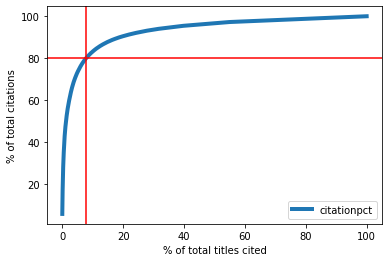

In [30]:
newlines = citedRefsMeta_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
newlines.axhline(y=80, color='r')
newlines.axvline(x=pctile, color='r')
newlines.set_ylabel('% of total citations')
newlines.set_xlabel('% of total titles cited')
plt.show()

## Plot 80/20 rule for your institution

Repeat the steps above to plot the 80/20 for your institution. Create a new dataframe for your institution. Then substitute a term for your institution in the place of "ucb" or Berkeley as needed.

In [22]:
#Example
citedRefsMeta_ucb = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'Berkeley']
citedRefsMeta_ucb

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
24042,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Abrahamson N., 2013, 201304 PEER U CAL, P143",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24043,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Abrahamson N, 2016, EARTHQ SPECTRA, V32, P23, ...",10.1193/051712EQS188MR,BC Hydro Ground Motion Prediction Equations fo...,Earthquake Spectra,2015.0,8755-2930,print,1944-8201,electronic,NaN
24044,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Ancheta T.D., 2013, 201303 PEER U CAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24045,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Ashford SA, 2002, J GEOTECH GEOENVIRON, V128, ...",10.1061/(ASCE)1090-0241(2002)128:2(119),Simplified Method for Evaluating Seismic Stabi...,Journal of Geotechnical and Geoenvironmental E...,2002.0,1090-0241,print,1943-5606,electronic,NaN
24046,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Atkinson GM, 2003, B SEISMOL SOC AM, V93, P170...",10.1785/0120020156,Empirical Ground-Motion Relations for Subducti...,Bulletin of the Seismological Society of America,2005.0,0037-1106,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40888,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 1999, GEOLOGICAL SURVEY CA, V544, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40889,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 2006, P ODP SCI RESULTS, V204, P1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40890,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 2000, P OCEAN DRILLING PRO, V164, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40891,Berkeley,10.1016/j.marpetgeo.2014.07.024,"Xu WY, 1999, J GEOPHYS RES-SOL EA, V104, P5081...",10.1029/1998JB900092,"Predicting the occurrence, distribution, and e...",Journal of Geophysical Research: Solid Earth,2002.0,0148-0227,print,NaN,NaN,NaN


In [23]:
citedRefsMeta_ucb_count = citedRefsMeta_ucb['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_ucb_count

,journal_book,counts
0,Journal of Geophysical Research,547
1,Geophysical Research Letters,471
2,Earth and Planetary Science Letters,339
3,Science,324
4,Nature,321
...,...,...
1590,Swiss Journal of Geosciences,1
1591,Circulation,1
1592,Pure and Applied Chemistry,1
1593,Botanical Journal of the Linnean Society,1


In [24]:
citedRefsMeta_ucb_count['cumsum'] = citedRefsMeta_ucb_count['counts'].cumsum()
citedRefsMeta_ucb_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,547,547
1,Geophysical Research Letters,471,1018
2,Earth and Planetary Science Letters,339,1357
3,Science,324,1681
4,Nature,321,2002
...,...,...,...
1590,Swiss Journal of Geosciences,1,12975
1591,Circulation,1,12976
1592,Pure and Applied Chemistry,1,12977
1593,Botanical Journal of the Linnean Society,1,12978


In [25]:
citedRefsMeta_ucb_count['titlenum'] = range(1, 1+len(citedRefsMeta_ucb_count))
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,547,547,1
1,Geophysical Research Letters,471,1018,2
2,Earth and Planetary Science Letters,339,1357,3
3,Science,324,1681,4
4,Nature,321,2002,5
...,...,...,...,...
1590,Swiss Journal of Geosciences,1,12975,1591
1591,Circulation,1,12976,1592
1592,Pure and Applied Chemistry,1,12977,1593
1593,Botanical Journal of the Linnean Society,1,12978,1594


In [26]:
#substitute your title number for "1595"
citedRefsMeta_ucb_count['titlepct'] = 100*(citedRefsMeta_ucb_count.titlenum/1595)
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,547,547,1,0.063654
1,Geophysical Research Letters,471,1018,2,0.127307
2,Earth and Planetary Science Letters,339,1357,3,0.190961
3,Science,324,1681,4,0.254615
4,Nature,321,2002,5,0.318269
...,...,...,...,...,...
1590,Swiss Journal of Geosciences,1,12975,1591,101.273074
1591,Circulation,1,12976,1592,101.336728
1592,Pure and Applied Chemistry,1,12977,1593,101.400382
1593,Botanical Journal of the Linnean Society,1,12978,1594,101.464036


In [31]:
#substitute your total citations for 12979

citedRefsMeta_ucb_count['citationpct'] = 100*citedRefsMeta_ucb_count['cumsum']/(12979)
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,547,547,1,0.063654,4.214500
1,Geophysical Research Letters,471,1018,2,0.127307,7.843439
2,Earth and Planetary Science Letters,339,1357,3,0.190961,10.455351
3,Science,324,1681,4,0.254615,12.951691
4,Nature,321,2002,5,0.318269,15.424917
...,...,...,...,...,...,...
1590,Swiss Journal of Geosciences,1,12975,1591,101.273074,99.969181
1591,Circulation,1,12976,1592,101.336728,99.976886
1592,Pure and Applied Chemistry,1,12977,1593,101.400382,99.984590
1593,Botanical Journal of the Linnean Society,1,12978,1594,101.464036,99.992295


In [32]:
ind=np.argmin(abs(80.-citedRefsMeta_ucb_count.citationpct))
pctile_ucb = citedRefsMeta_ucb_count.titlepct[ind]
pctile_ucb

17.250159134309357

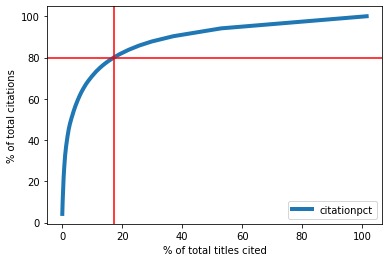

In [33]:
ucblines = citedRefsMeta_ucb_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
ucblines.axhline(y=80, color='r')
ucblines.axvline(x=pctile_ucb, color='r')
ucblines.set_ylabel('% of total citations')
ucblines.set_xlabel('% of total titles cited')
plt.show()

Plot your institution vs the entire group:

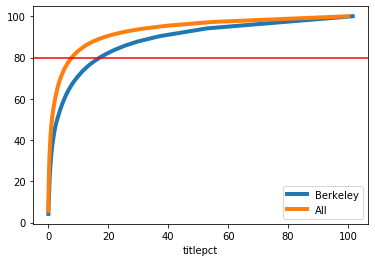

In [34]:
ax = citedRefsMeta_ucb_count.plot(x='titlepct', y='citationpct', linewidth=4, label = 'Berkeley')
citedRefsMeta_count.plot(ax=ax, x='titlepct', y='citationpct', linewidth=4, label = 'All').axhline(y=80, color='r')

### Notes and some references:

*Note: on splitting & stacking method*  
For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://gist.github.com/jlln/338b4b0b55bd6984f883

CrossRef API documentation: https://github.com/CrossRef/rest-api-doc